In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')


In [40]:
### Descriptive Analytics for Numerical Columns

In [41]:
### Reading Sales & Discounts csv file
sales_data_with_discounts_df = pd.read_csv('sales_data_with_discounts.csv')

In [42]:
sales_data_with_discounts_df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [43]:
sales_data_with_discounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [44]:

numeric_columns = sales_data_with_discounts_df.select_dtypes(include=['number']).columns

In [45]:
### Mean (Average of numbers) = Sum of numbers/Total numbers counts
### Below Code is to find Mean of Numeric columns. Output is rounded upto 2 decimal

for column in numeric_columns:
  print(f"Mean of {column}", round(sales_data_with_discounts_df[column].mean(), 2))
  ##print(f"Median of {column}", sales_data_with_discounts_df[column].median())
  ##print(f"Mode of {column}", sales_data_with_discounts_df[column].mode())

Mean of Volume 5.07
Mean of Avg Price 10453.43
Mean of Total Sales Value 33812.84
Mean of Discount Rate (%) 15.16
Mean of Discount Amount 3346.5
Mean of Net Sales Value 30466.34


In [46]:
### Median - The median is the middle value in a sorted data set.
### Below Code is to find median of Numeric columns. Output is rounded upto 2 decimal

for column in numeric_columns:
  print(f"Median of {column}", round(sales_data_with_discounts_df[column].median(),2))
  ##print(f"Mode of {column}", sales_data_with_discounts_df[column].mode())

Median of Volume 4.0
Median of Avg Price 1450.0
Median of Total Sales Value 5700.0
Median of Discount Rate (%) 16.58
Median of Discount Amount 988.93
Median of Net Sales Value 4677.79


In [47]:
### Mode - The mode is the value that appears most frequently in a data set.
### Below Code is to find mode of Numeric columns. Output is rounded upto 2 decimal

for column in numeric_columns:
  print(f"Mode of {column}", sales_data_with_discounts_df[column].mode())

Mode of Volume 0    3
Name: Volume, dtype: int64
Mode of Avg Price 0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64
Mode of Total Sales Value 0    24300
Name: Total Sales Value, dtype: int64
Mode of Discount Rate (%) 0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64
Mode of Discount Amount 0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64
Mode of Net Sales Value 0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448 

In [48]:
### Standard Deviation - The standard deviation is a measure of how spread out the numbers are in a data set. It tells you how much the values deviate from the mean.
### Below Code is to find standard deviation of Numeric columns. Output is rounded upto 2 decimal

for column in numeric_columns:
  print(f"Standard Deviation of {column}", round(np.std(sales_data_with_discounts_df[column],ddof=1),2))

Standard Deviation of Volume 4.23
Standard Deviation of Avg Price 18079.9
Standard Deviation of Total Sales Value 50535.07
Standard Deviation of Discount Rate (%) 4.22
Standard Deviation of Discount Amount 4509.9
Standard Deviation of Net Sales Value 46358.66


In [49]:
### Data Visualization

In [50]:
### Function return skewness
def get_skewness(data):
  skew_value = int(round(skew(data)))
  if skew_value > 0:
    return "Positive Skewed"
  elif skew_value < 0:
    return "Negative Skewed"
  else:
    return "Symmetric Skewed"

### Function return Ouliers
def get_outliers_and_interquartile(data):
  df = pd.DataFrame({'value' : data})
  Q1 = df['value'].quantile(0.25)
  Q3 = df['value'].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df['value'] < Q1 - 1.5 * IQR) | (df['value'] > Q3 + 1.5 * IQR)]
  return f"Q1 - {round(Q1,2)} , Q3 - {round(Q3,2)}, IQR - {round(IQR,2)} , Outliers exists  - {'Yes' if len(outliers)> 0 else  'No'}"



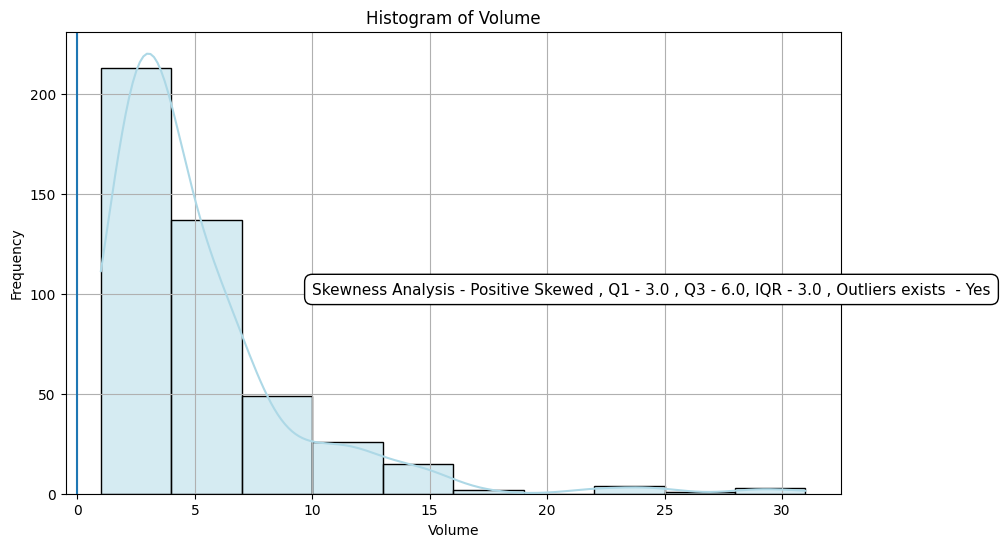

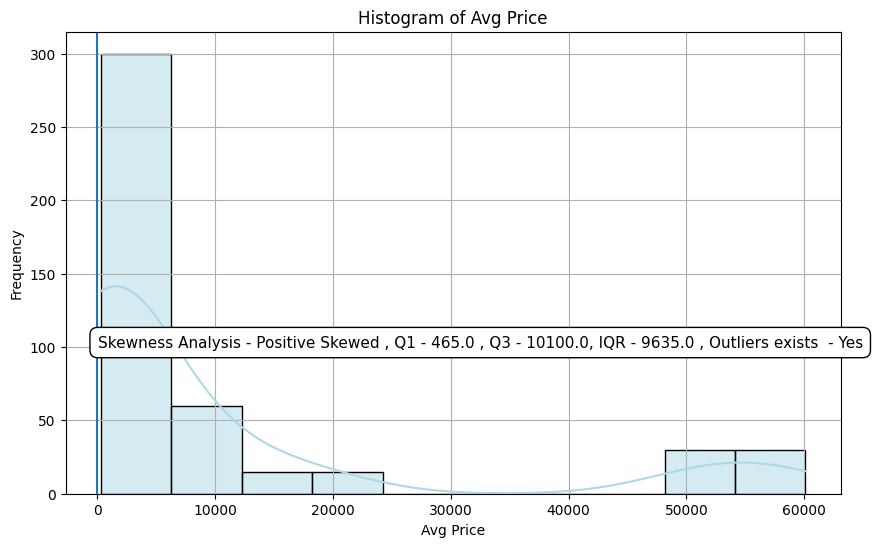

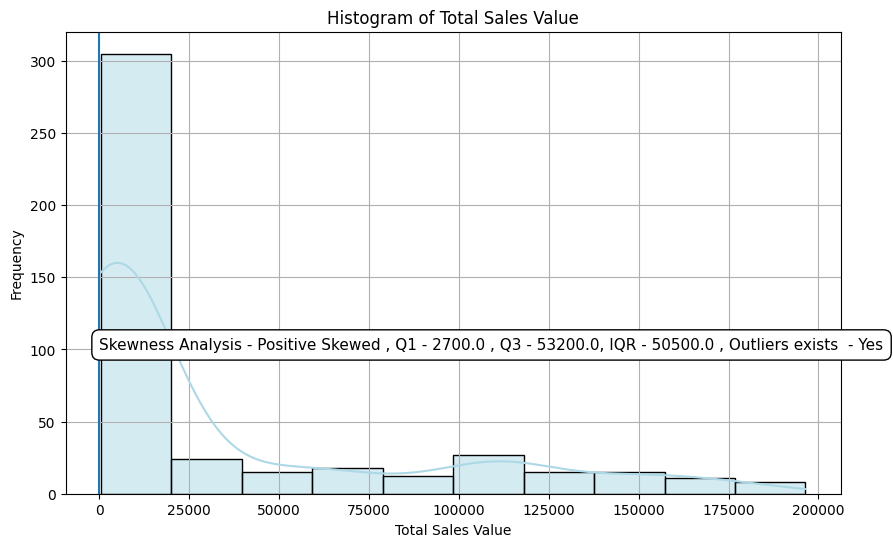

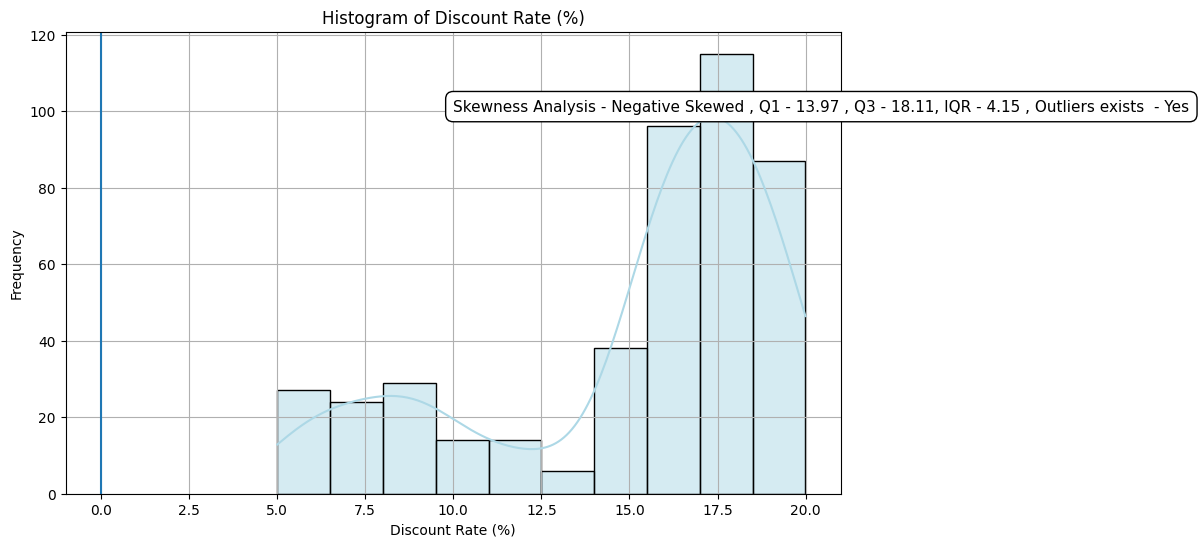

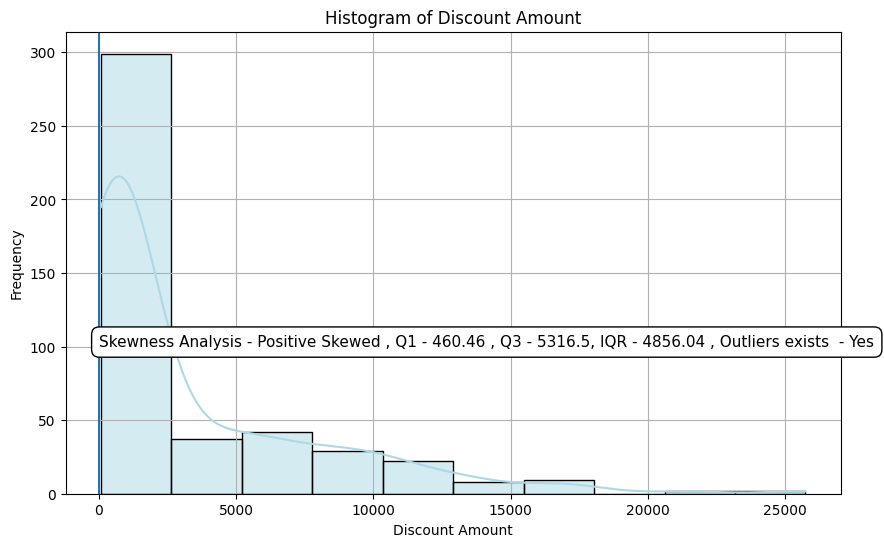

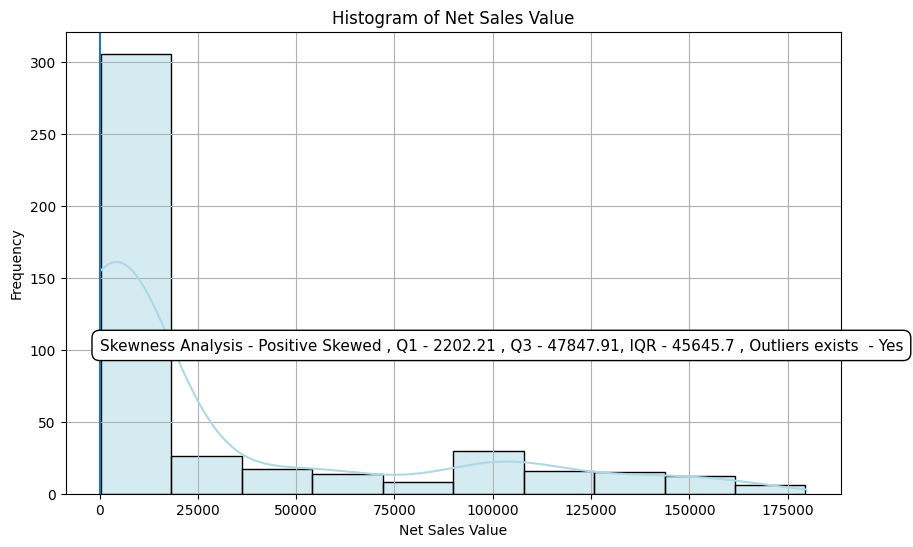

In [51]:
### Plot Histograms for each numerical columns along with Skewness analysis & number of outliers in Text summary
for column in numeric_columns:
  plt.figure(figsize=(10, 6))
  ##plt.hist(sales_data_with_discounts_df[column], bins=10, color='skyblue', edgecolor='black')
  sns.histplot(sales_data_with_discounts_df[column], bins=10, kde=True, color='lightblue', edgecolor='black')
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel('Frequency')
  # Add summary comment
  plt.text(10, 100, f"Skewness Analysis - {get_skewness(sales_data_with_discounts_df[column])} , {get_outliers_and_interquartile(sales_data_with_discounts_df[column])}",
         fontsize=11, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
  plt.axvline()
  plt.grid(True)

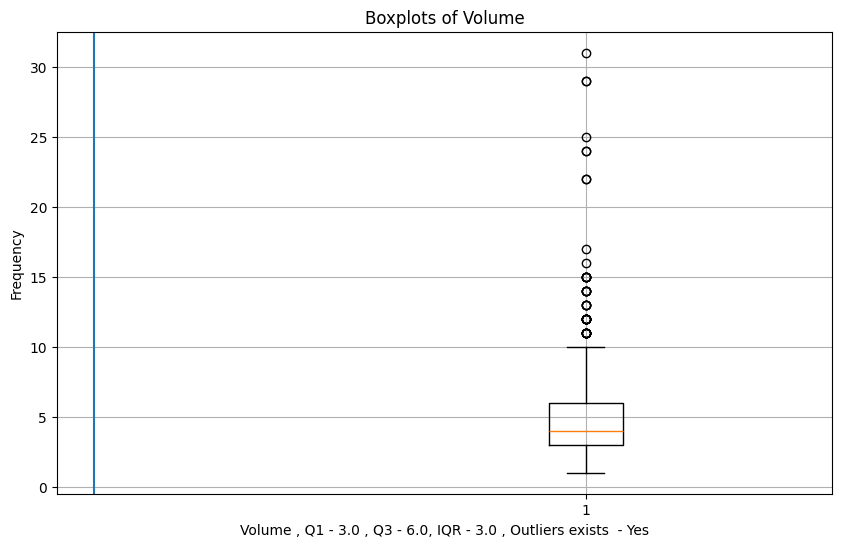

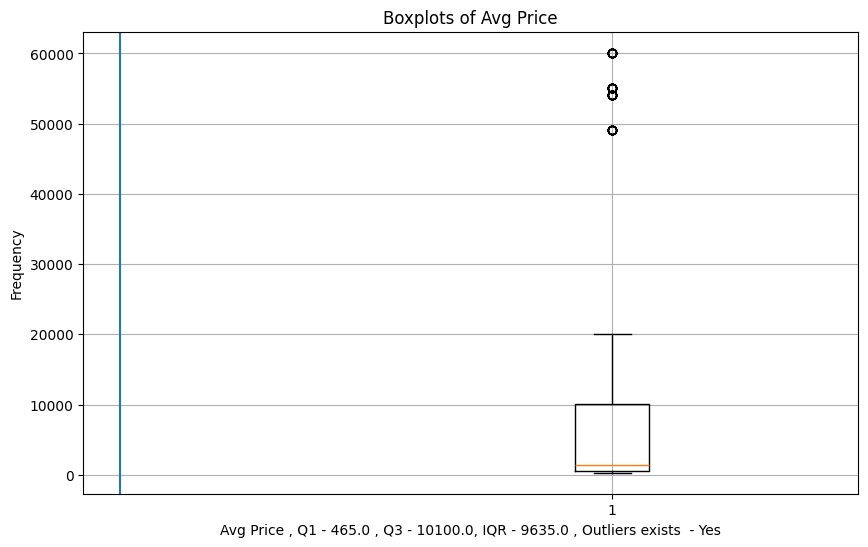

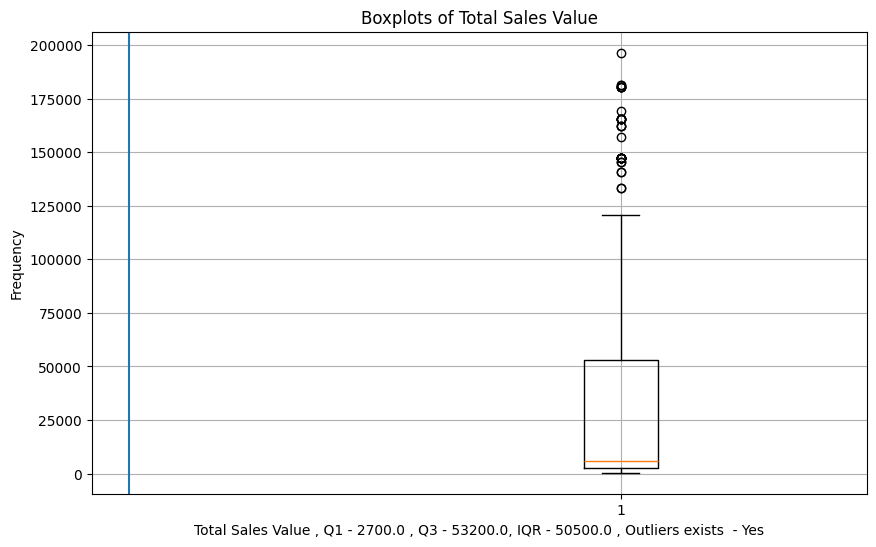

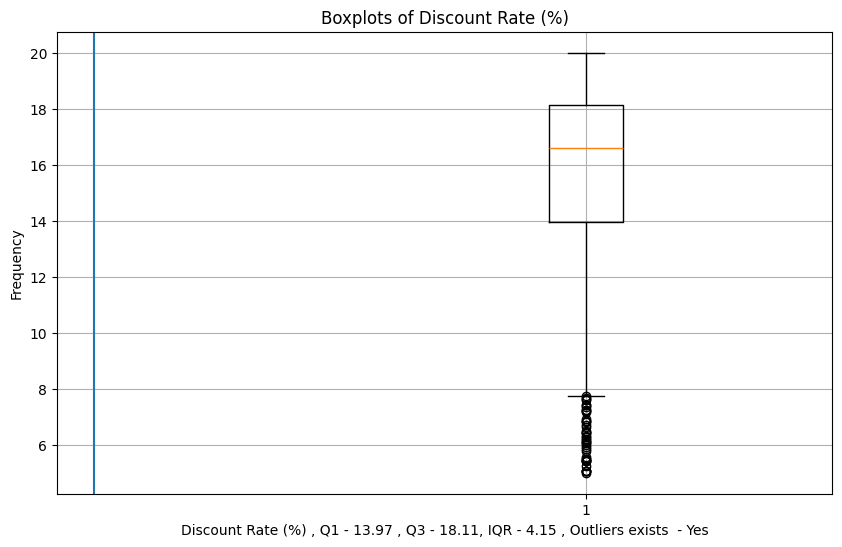

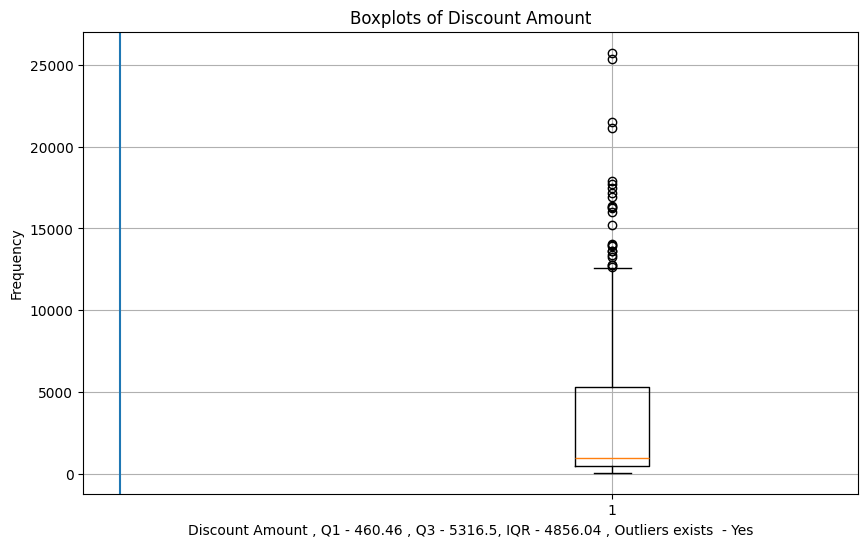

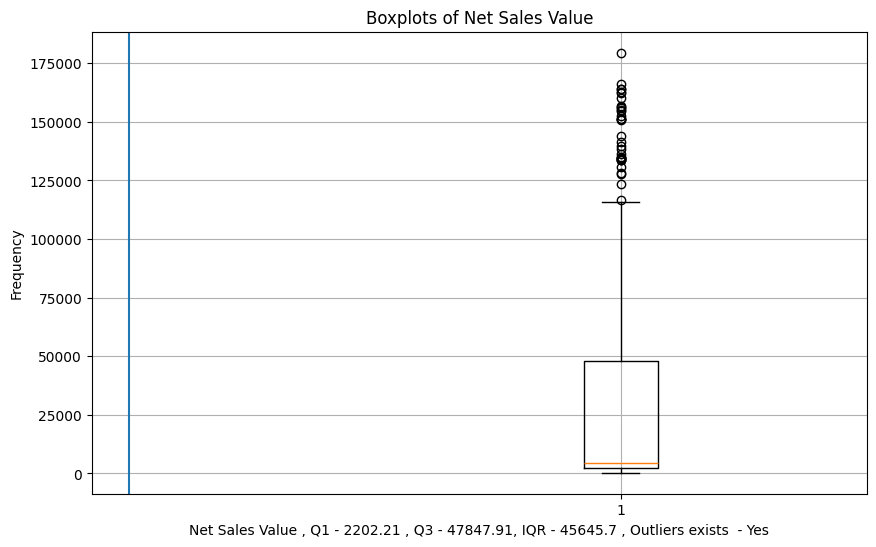

In [52]:
### Plot Boxplots for each numerical columns along with Skewness analysis & number of outliers in Text summary
for column in numeric_columns:
  plt.figure(figsize=(10, 6))
  ##plt.hist(sales_data_with_discounts_df[column], bins=10, color='skyblue', edgecolor='black')
  plt.boxplot(sales_data_with_discounts_df[column])
  plt.title(f"Boxplots of {column}")
  plt.xlabel(f"{column} , {get_outliers_and_interquartile(sales_data_with_discounts_df[column])}")
  plt.ylabel('Frequency')
  plt.axvline()
  plt.grid(True)

In [53]:
### Bar Chart Analysis for Categorical Column

In [54]:
categorical_columns = sales_data_with_discounts_df.select_dtypes(include=['object']).columns

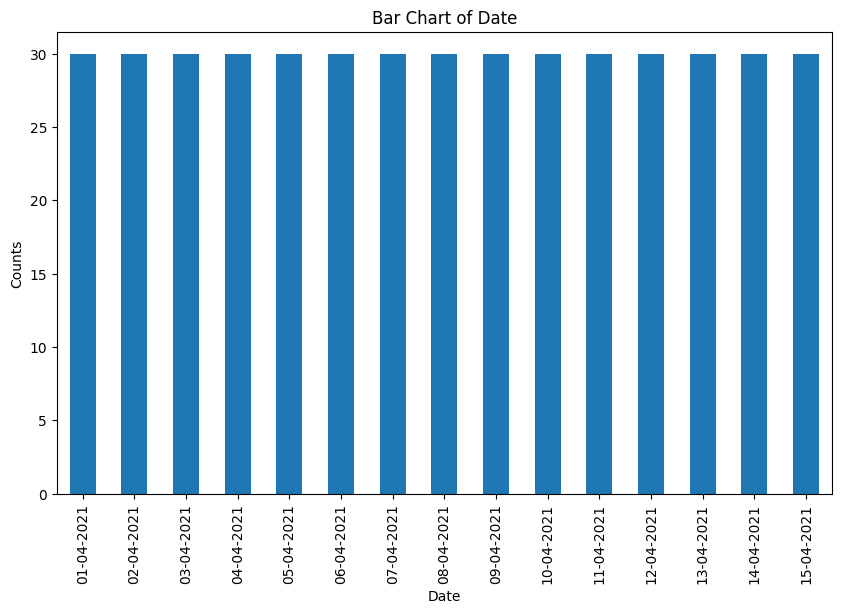

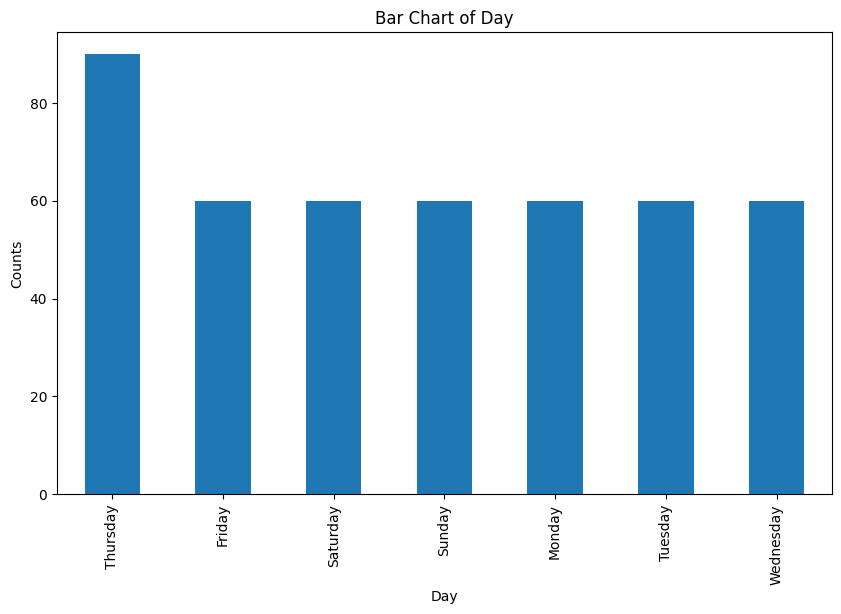

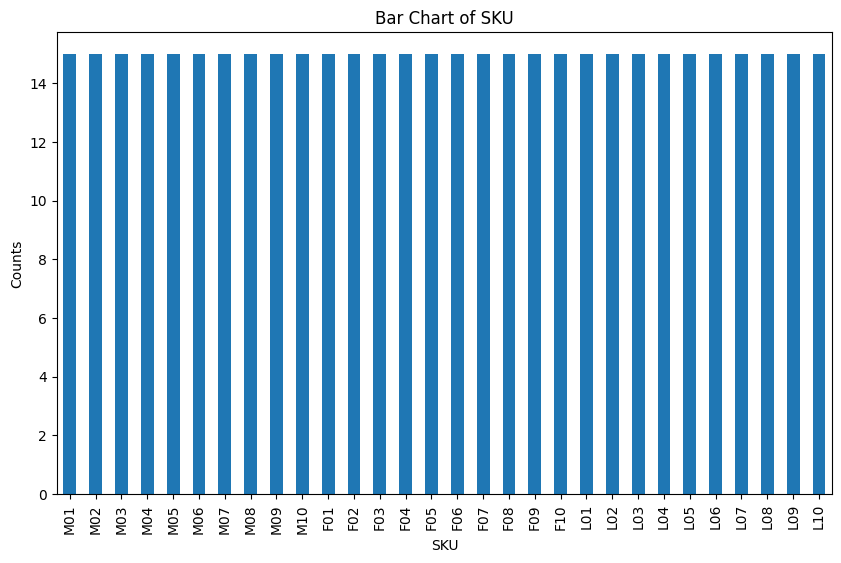

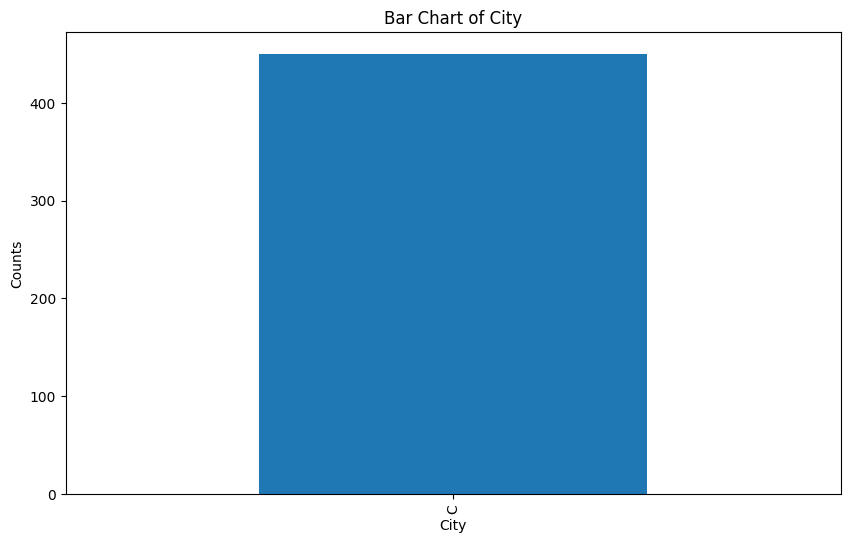

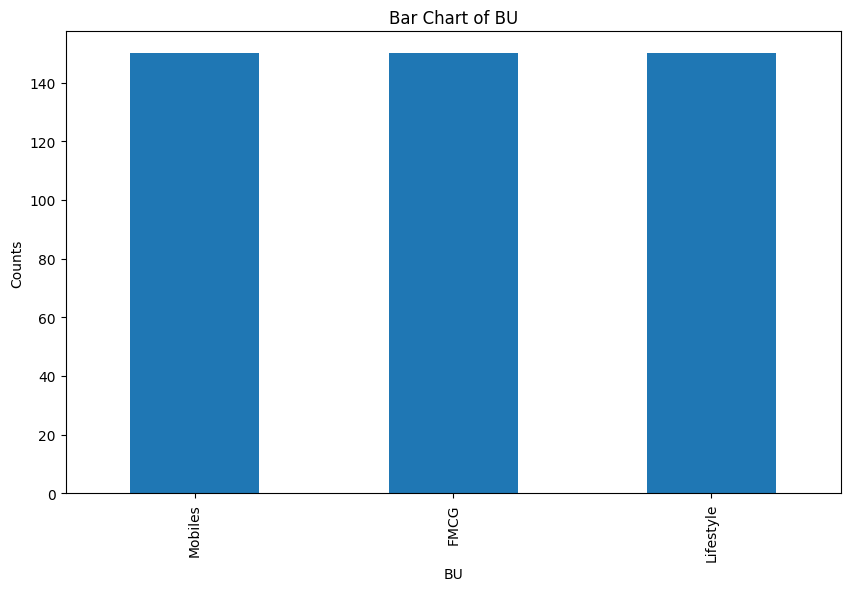

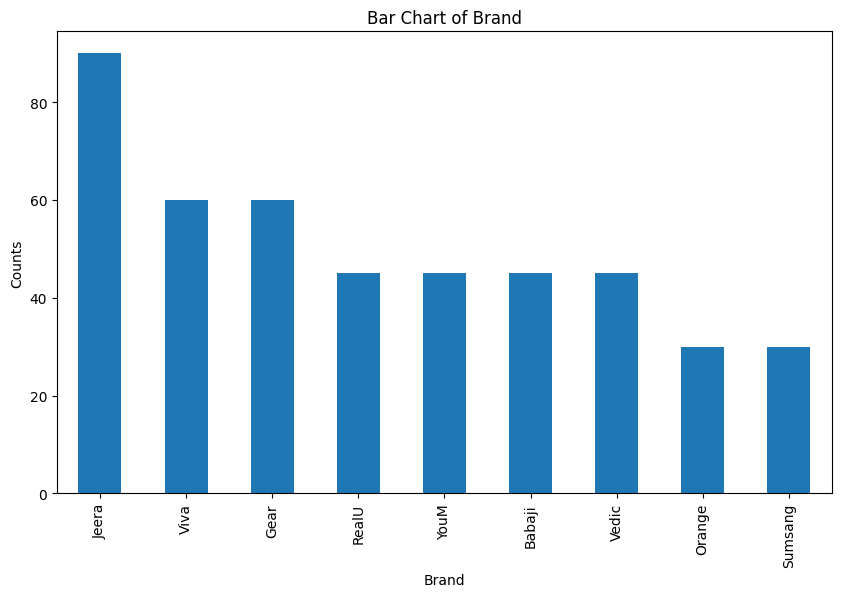

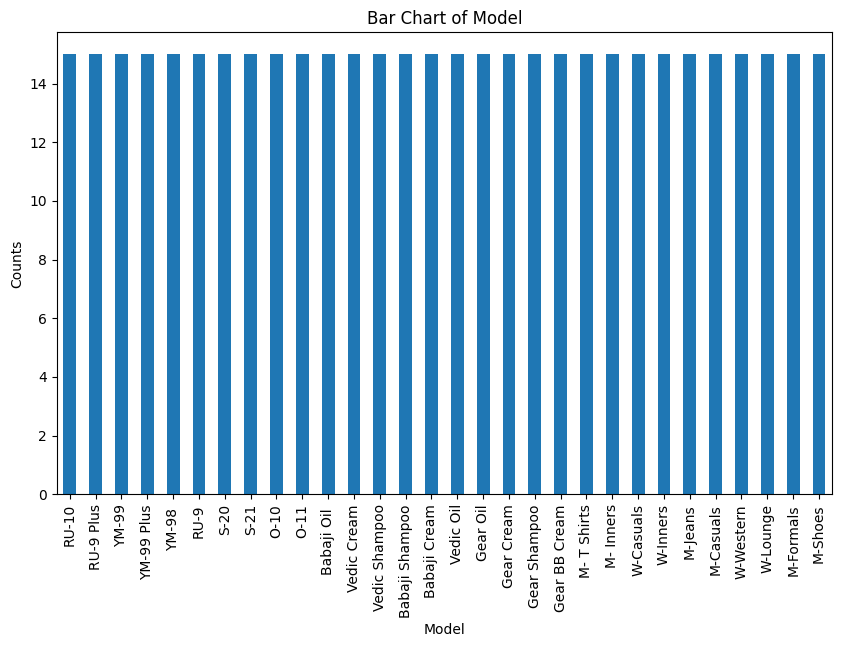

In [55]:
for column in categorical_columns:
  plt.figure(figsize=(10, 6))
  sales_data_with_discounts_df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('Counts')
  plt.title(f"Bar Chart of {column}")

In [56]:
### Function: Analyze Categorical Column Distribution
def analyze_categorical_distribution(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return

    # Clean data (drop NaN)
    series = df[column].dropna()

    # Frequency & percentage
    counts = series.value_counts()
    percentages = series.value_counts(normalize=True) * 100

    # Summary stats
    most_common = counts.idxmax()
    most_common_pct = percentages[most_common]
    least_common = counts.idxmin()
    least_common_pct = percentages[least_common]

    # Display counts and percentages
    summary_df = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
    print("\n🔍 Category Distribution:")
    print(summary_df)

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    sns.countplot(x=series, palette='pastel', edgecolor='black')
    plt.title(f"Distribution of '{column}'")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Print insights
    print("\n Insights:")
    print(f"- Total categories: {series.nunique()}")
    print(f"- Most common: '{most_common}' ({most_common_pct:.1f}%)")
    print(f"- Least common: '{least_common}' ({least_common_pct:.1f}%)")

    if most_common_pct > 50:
        print("- ⚠️ The distribution is skewed — dominated by one category.")
    elif most_common_pct < 30 and series.nunique() > 4:
        print("- ✅ The distribution appears fairly balanced across categories.")
    else:
        print("- ℹ️ Moderate skew present — consider balancing if modeling.")




🔍 Category Distribution:
            Count  Percentage (%)
Date                             
01-04-2021     30            6.67
02-04-2021     30            6.67
03-04-2021     30            6.67
04-04-2021     30            6.67
05-04-2021     30            6.67
06-04-2021     30            6.67
07-04-2021     30            6.67
08-04-2021     30            6.67
09-04-2021     30            6.67
10-04-2021     30            6.67
11-04-2021     30            6.67
12-04-2021     30            6.67
13-04-2021     30            6.67
14-04-2021     30            6.67
15-04-2021     30            6.67


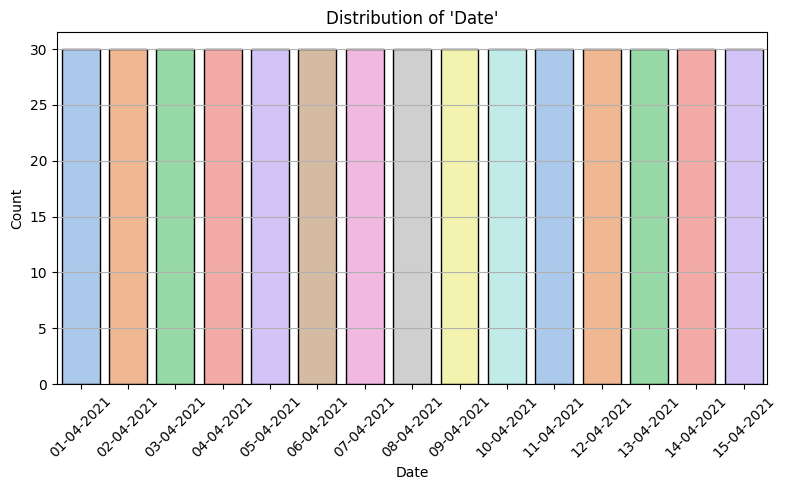


 Insights:
- Total categories: 15
- Most common: '01-04-2021' (6.7%)
- Least common: '01-04-2021' (6.7%)
- ✅ The distribution appears fairly balanced across categories.

🔍 Category Distribution:
           Count  Percentage (%)
Day                             
Thursday      90           20.00
Friday        60           13.33
Saturday      60           13.33
Sunday        60           13.33
Monday        60           13.33
Tuesday       60           13.33
Wednesday     60           13.33


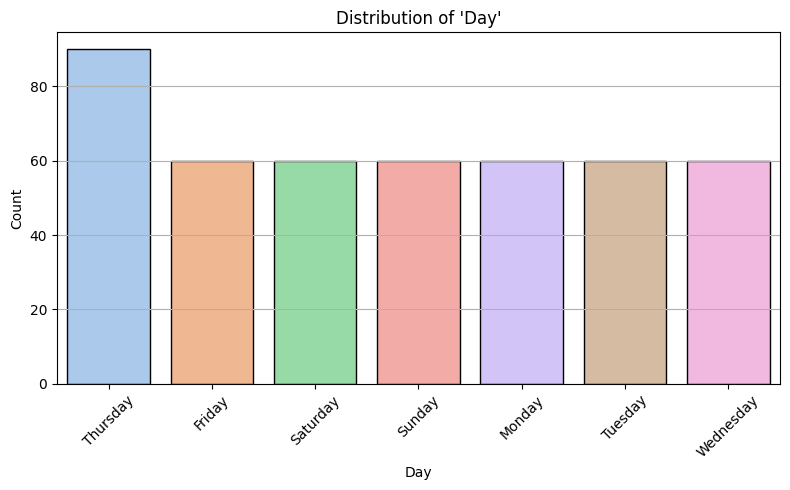


 Insights:
- Total categories: 7
- Most common: 'Thursday' (20.0%)
- Least common: 'Friday' (13.3%)
- ✅ The distribution appears fairly balanced across categories.

🔍 Category Distribution:
     Count  Percentage (%)
SKU                       
M01     15            3.33
M02     15            3.33
M03     15            3.33
M04     15            3.33
M05     15            3.33
M06     15            3.33
M07     15            3.33
M08     15            3.33
M09     15            3.33
M10     15            3.33
F01     15            3.33
F02     15            3.33
F03     15            3.33
F04     15            3.33
F05     15            3.33
F06     15            3.33
F07     15            3.33
F08     15            3.33
F09     15            3.33
F10     15            3.33
L01     15            3.33
L02     15            3.33
L03     15            3.33
L04     15            3.33
L05     15            3.33
L06     15            3.33
L07     15            3.33
L08     15            3.33

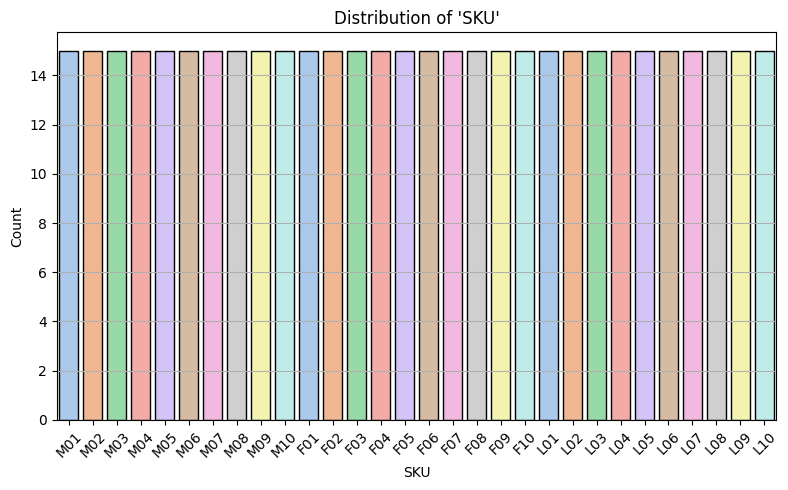


 Insights:
- Total categories: 30
- Most common: 'M01' (3.3%)
- Least common: 'M01' (3.3%)
- ✅ The distribution appears fairly balanced across categories.

🔍 Category Distribution:
      Count  Percentage (%)
City                       
C       450           100.0


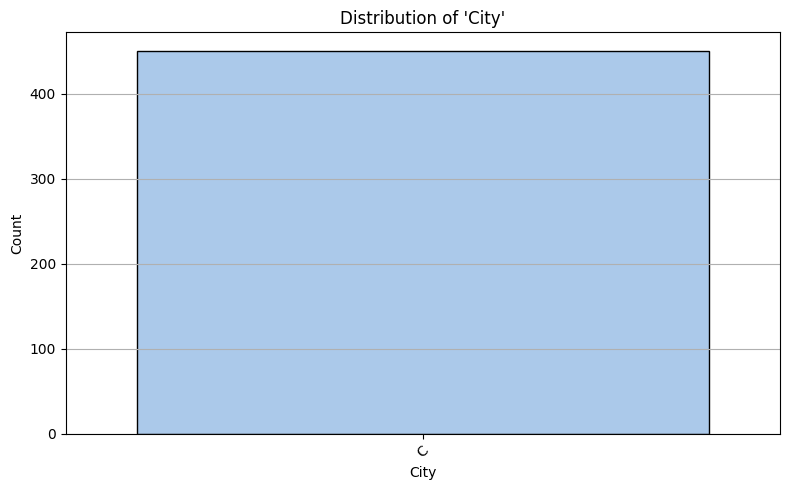


 Insights:
- Total categories: 1
- Most common: 'C' (100.0%)
- Least common: 'C' (100.0%)
- ⚠️ The distribution is skewed — dominated by one category.

🔍 Category Distribution:
           Count  Percentage (%)
BU                              
Mobiles      150           33.33
FMCG         150           33.33
Lifestyle    150           33.33


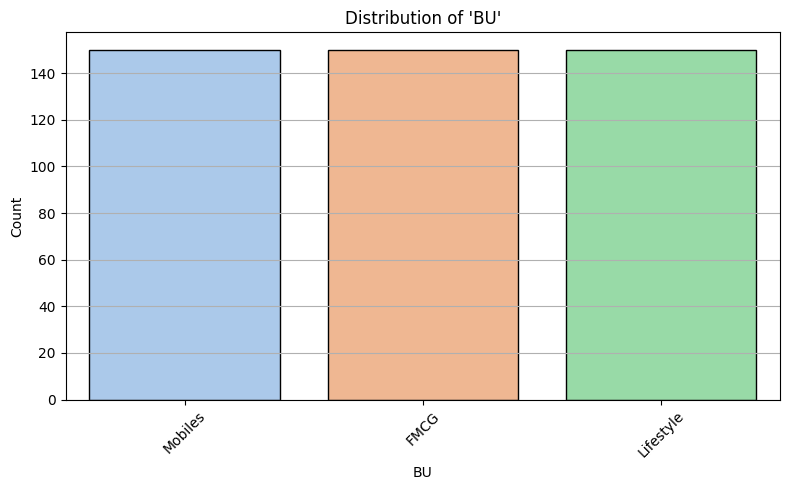


 Insights:
- Total categories: 3
- Most common: 'Mobiles' (33.3%)
- Least common: 'Mobiles' (33.3%)
- ℹ️ Moderate skew present — consider balancing if modeling.

🔍 Category Distribution:
         Count  Percentage (%)
Brand                         
Jeera       90           20.00
Viva        60           13.33
Gear        60           13.33
RealU       45           10.00
YouM        45           10.00
Babaji      45           10.00
Vedic       45           10.00
Orange      30            6.67
Sumsang     30            6.67


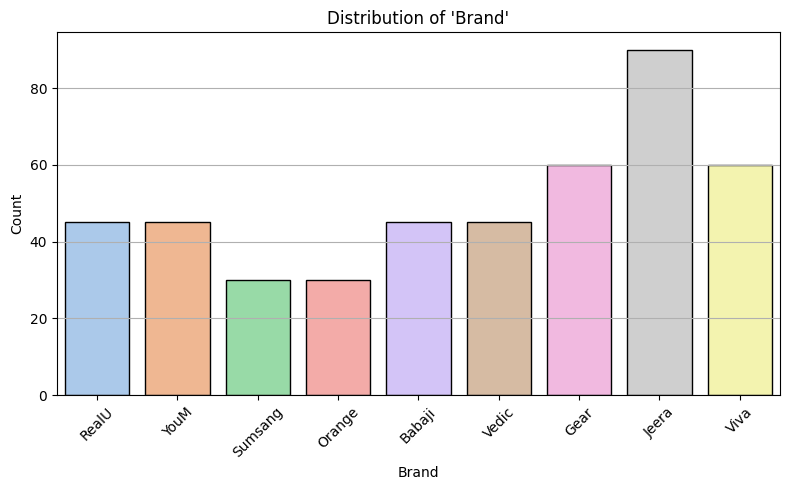


 Insights:
- Total categories: 9
- Most common: 'Jeera' (20.0%)
- Least common: 'Orange' (6.7%)
- ✅ The distribution appears fairly balanced across categories.

🔍 Category Distribution:
                Count  Percentage (%)
Model                                
RU-10              15            3.33
RU-9 Plus          15            3.33
YM-99              15            3.33
YM-99 Plus         15            3.33
YM-98              15            3.33
RU-9               15            3.33
S-20               15            3.33
S-21               15            3.33
O-10               15            3.33
O-11               15            3.33
Babaji Oil         15            3.33
Vedic Cream        15            3.33
Vedic Shampoo      15            3.33
Babaji Shampoo     15            3.33
Babaji Cream       15            3.33
Vedic Oil          15            3.33
Gear Oil           15            3.33
Gear Cream         15            3.33
Gear Shampoo       15            3.33
Gear BB Cream  

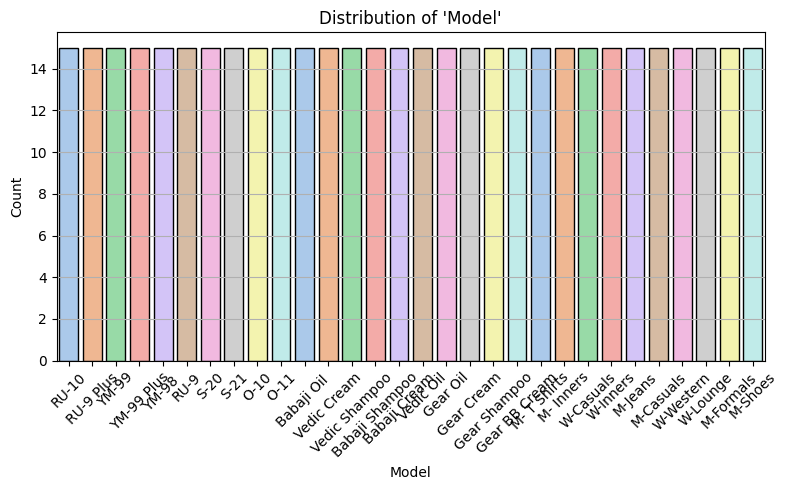


 Insights:
- Total categories: 30
- Most common: 'RU-10' (3.3%)
- Least common: 'RU-10' (3.3%)
- ✅ The distribution appears fairly balanced across categories.


In [57]:
### Each Categorical Column Distribution Analysis
for column in categorical_columns:
  analyze_categorical_distribution(sales_data_with_discounts_df,column)

In [73]:
### Standardization of Numerical Variables
### Z-score normalization
# Z-score normalization, also called standardization, is a method of scaling numerical data.

### Z-score normalization key features
# This transformation is especially useful when features in your data have different units, ranges, or scales, which could negatively affect the performance of machine learning algorithms.
# To Standardize Feature Scales - It ensures all features contribute equally.
# Standardizing different unit data to allows fair comparison.
# Z-scores help detect outliers.


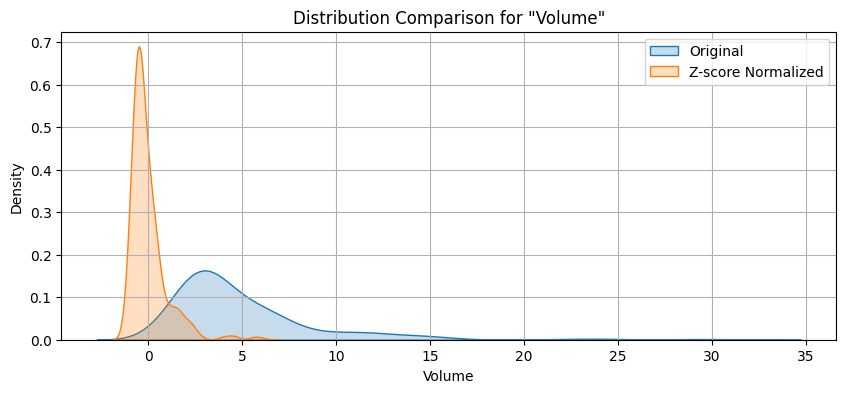

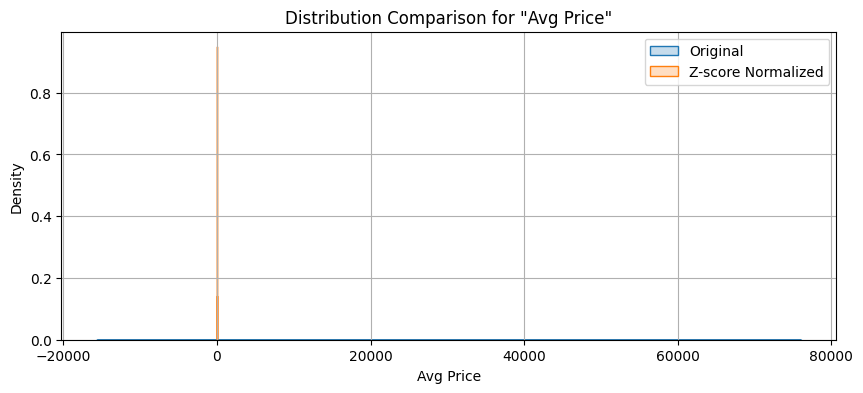

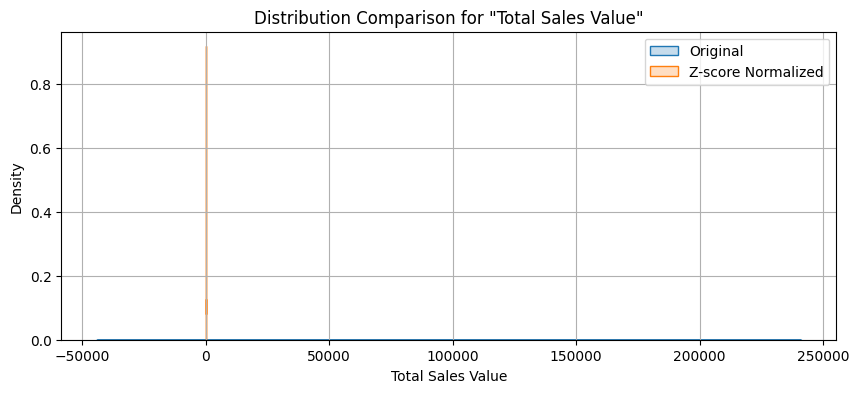

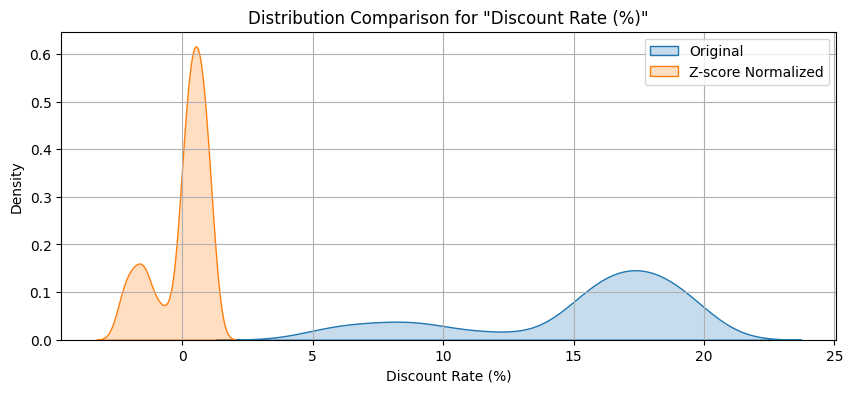

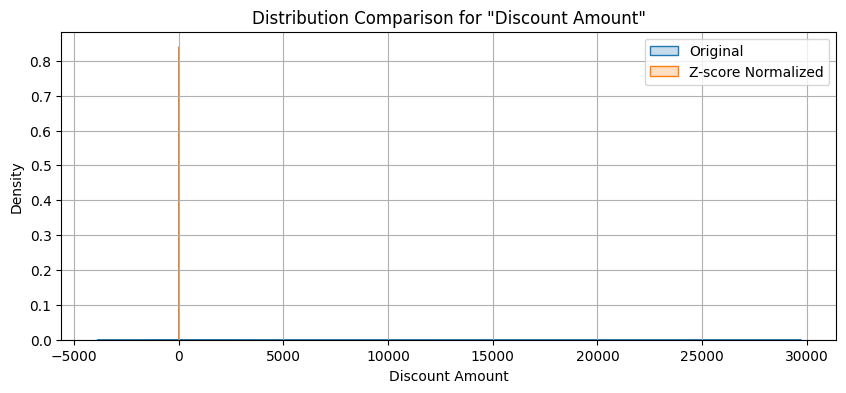

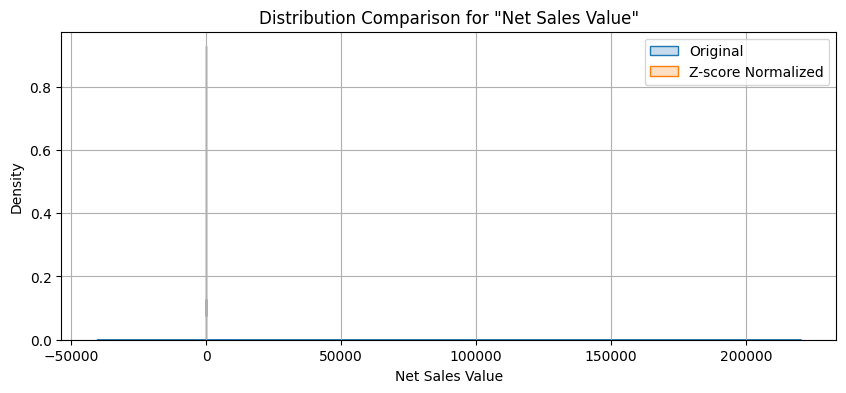

In [59]:
# Z-score normalization using formula z=x-mu/sigma

nuerical_columns_normalized_df = (sales_data_with_discounts_df[numeric_columns] - sales_data_with_discounts_df[numeric_columns].mean()) / sales_data_with_discounts_df[numeric_columns].std()

# Compare Distributions Before and After Normalization
for column in sales_data_with_discounts_df[numeric_columns]:
    plt.figure(figsize=(10, 4))

    # Original distribution
    sns.kdeplot(sales_data_with_discounts_df[column], label='Original', fill=True)

    # Normalized distribution
    sns.kdeplot(nuerical_columns_normalized_df[column], label='Z-score Normalized', fill=True)

    plt.title(f'Distribution Comparison for "{column}"')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


In [60]:
### Conversion of Categorical Data into Dummy Variables

In [72]:
### One-hot encoding
# One-hot encoding is a method used to convert categorical variables (text labels) into a numerical format that machine learning algorithms can understand — without introducing misleading relationships.

### One-hot encoding key features
# One-hot encoding transforms categorical variables into binary (0/1) columns, making them usable for machine learning models that require numerical input.
# Avoids Misleading Ordinal Relationships
# Keeps each category independent and equally important.
# Improves Model Performance
# Helps models make clearer distinctions between categories without introducing bias.



In [62]:
### Apply One-hot encoding on categorical columns in given data set

In [63]:
categorical_columns_normalized_df = pd.get_dummies(sales_data_with_discounts_df, columns=categorical_columns)

categorical_columns_normalized_df = categorical_columns_normalized_df.drop(columns=numeric_columns)

In [64]:
### Display a portion of the transformed dataset.

categorical_columns_normalized_df.head()

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [65]:
### Conclusion

### Data preprocessing is a critical step in data analysis and machine learning because raw data is rarely clean, consistent, or in a format that algorithms can effectively work with. Two key preprocessing techniques — standardization and one-hot encoding — play distinct but complementary roles in preparing data for modeling.

In [66]:
### Before Normalization

In [67]:
sales_data_with_discounts_df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [68]:
sales_data_with_discounts_normalized_df = pd.merge(nuerical_columns_normalized_df,categorical_columns_normalized_df, left_index=True, right_index=True)

In [69]:
### After Normalization

In [70]:
sales_data_with_discounts_normalized_df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00
